In [94]:
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
df = pd.read_csv('C:\\Arquivos\\Programas\\python\\birdie2020\\crawler\\LowesCrawler\\lowescrawler\\spiders\\lowes.csv')
df.head()

,Id,Titulo,Modelo,Marca,Estrelas,Avaliacoes
0,852884,18-cu ft Top-Freezer Refrigerator (White),FFTR1814TW,Frigidaire,4.5,12552
1,712177,24.52-cu ft Side-by-Side Refrigerator with Ice...,RS25J500DSR,Samsung,3.5,552
2,1030901,24.6-cu ft Side-by-Side Refrigerator with Ice ...,WRS315SDHZ,Whirlpool,4.5,1806
3,852875,26.8-cu ft French Door Refrigerator with Ice M...,FFHB2750TD,Frigidaire,4.5,4044
4,618013,26.2-cu ft Side-by-Side Refrigerator with Ice ...,LSXS26326S,LG,4.0,1000


In [67]:
df = df.drop_duplicates()

In [68]:
df.describe()

,Id,Estrelas,Avaliacoes
count,2.300000e+02,230.000000,230.000000
mean,1.196157e+06,4.271739,955.782609
std,5.179268e+05,0.432149,1517.003204
min,3.526800e+04,1.500000,1.000000
25%,7.888682e+05,4.000000,90.000000
50%,1.160469e+06,4.500000,384.500000
75%,1.479381e+06,4.500000,1225.500000
max,2.569141e+06,5.000000,12552.000000


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 0 to 263
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          230 non-null    int64  
 1   Titulo      230 non-null    object 
 2   Modelo      230 non-null    object 
 3   Marca       230 non-null    object 
 4   Estrelas    230 non-null    float64
 5   Avaliacoes  230 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 12.6+ KB


# Visualização

In [71]:
d_estrelas = {}
d_avaliacoes = {}
for m in df['Marca'].unique():
    d_estrelas.update({m:df[df['Marca'] ==  m]['Estrelas'].mean()})
    d_avaliacoes.update({m:df[df["Marca"] ==  m]['Avaliacoes'].sum()})

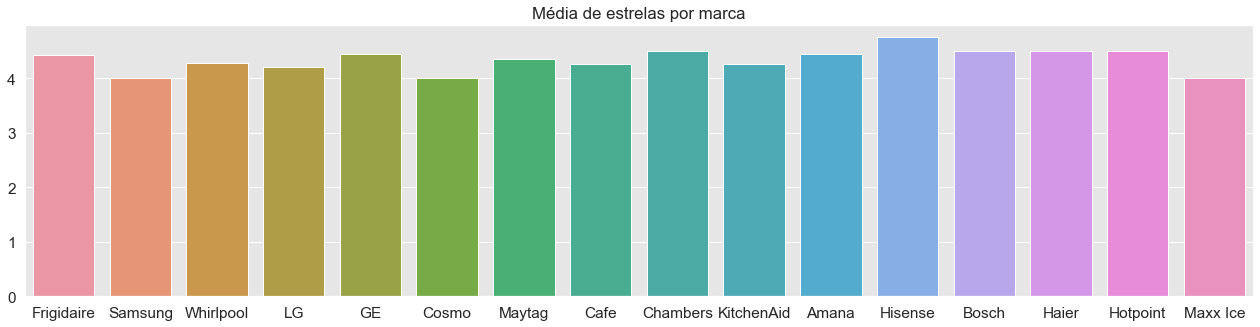

In [121]:
sns.set(font_scale=1.4)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(22, 5))
plt.title("Média de estrelas por marca")
sns.barplot(x=list(d_estrelas.keys()), y=list(d_estrelas.values()))

In [114]:
d_avaliacoes_order = {k: v for k, v in sorted(d_avaliacoes.items(), key=lambda item: item[1],
                           reverse=True)}

{'Whirlpool': 72298,
 'GE': 50136,
 'Frigidaire': 43211,
 'Samsung': 20689,
 'Cafe': 10611,
 'KitchenAid': 8333,
 'Maytag': 6421,
 'LG': 5435,
 'Amana': 1292,
 'Hotpoint': 580,
 'Haier': 417,
 'Bosch': 371,
 'Hisense': 27,
 'Chambers': 7,
 'Cosmo': 1,
 'Maxx Ice': 1}

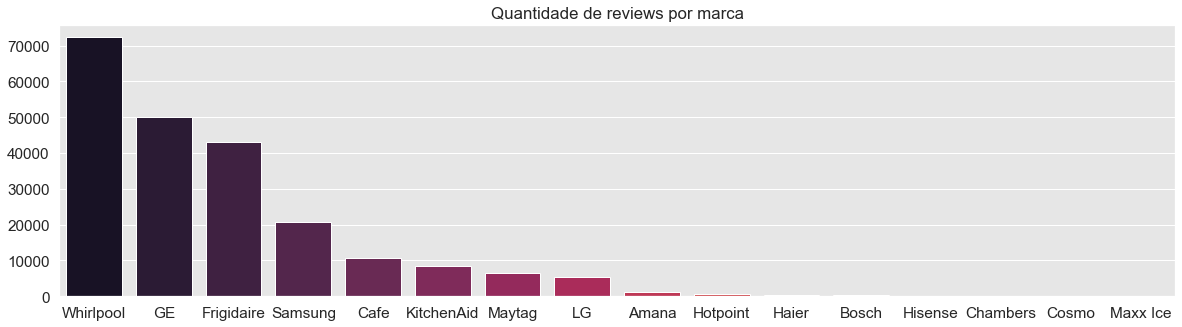

In [116]:
plt.figure(figsize=(20, 5))
plt.title("Quantidade de reviews por marca")
sns.barplot(x=list(d_avaliacoes_order.keys()), y=list(d_avaliacoes_order.values()), palette='rocket')